## HELP international Assignment Sahil Bansal

In [1]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#reading Dataset
dataset = pd.read_csv("Country-data.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)


### Data quality check and cleaning

In [3]:
# Let's look top 5 rows
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Sanity Check
print(dataset.shape)
dataset.describe()
dataset.info()


(167, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
#Na Handling
dataset.isnull().values.any()
dataset.isnull().values.sum()
dataset.isnull().sum()*100/dataset.shape[0]

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [6]:
#Sanity check
dataset.shape
dataset.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
# making a copy
new_dataset=dataset

## Outlier Treatment

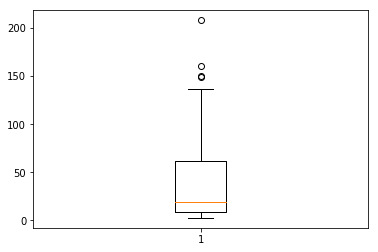

In [8]:
# outlier treatment for child_ mort 
plt.boxplot(dataset.child_mort)
Q1 = dataset.child_mort.quantile(0.25)
Q3 = dataset.child_mort.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset.child_mort >= Q1 - 1.5*IQR) & (dataset.child_mort <= Q3 + 1.5*IQR)]

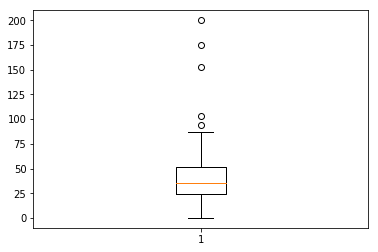

In [9]:
# outlier treatment for exports 
plt.boxplot(dataset.exports)
Q1 = dataset.exports.quantile(0.25)
Q3 = dataset.exports.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset.exports >= Q1 - 1.5*IQR) & (dataset.exports <= Q3 + 1.5*IQR)]

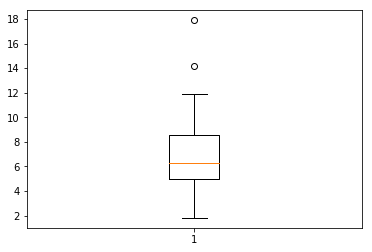

In [10]:
# outlier treatment for health 
plt.boxplot(dataset.health)
Q1 = dataset.health.quantile(0.25)
Q3 = dataset.health.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset.health >= Q1 - 1.5*IQR) & (dataset.health <= Q3 + 1.5*IQR)]

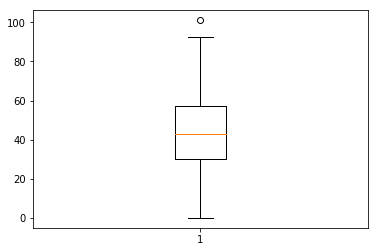

In [11]:
# outlier treatment for imports
plt.boxplot(dataset.imports)
Q1 = dataset.imports.quantile(0.25)
Q3 = dataset.imports.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset.imports >= Q1 - 1.5*IQR) & (dataset.imports <= Q3 + 1.5*IQR)]

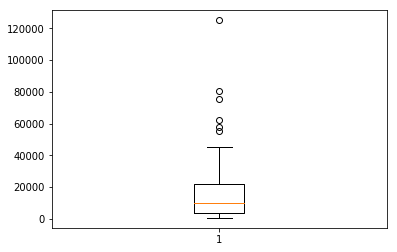

In [12]:
# outlier treatment for income 
plt.boxplot(dataset.income)
Q1 = dataset.income.quantile(0.25)
Q3 = dataset.income.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset.income >= Q1 - 1.5*IQR) & (dataset.income <= Q3 + 1.5*IQR)]

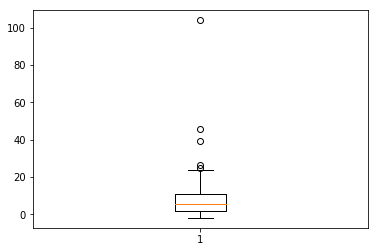

In [13]:
# outlier treatment for inflation
plt.boxplot(dataset.inflation)
Q1 = dataset.inflation.quantile(0.25)
Q3 = dataset.inflation.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset.inflation >= Q1 - 1.5*IQR) & (dataset.inflation <= Q3 + 1.5*IQR)]

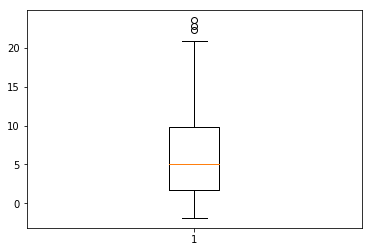

In [14]:
# outlier treatment for inflation
plt.boxplot(dataset.inflation)
Q1 = dataset.inflation.quantile(0.25)
Q3 = dataset.inflation.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset.inflation >= Q1 - 1.5*IQR) & (dataset.inflation <= Q3 + 1.5*IQR)]

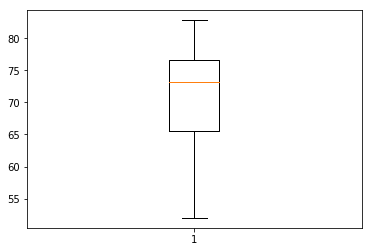

In [15]:
# outlier treatment for life_expec
plt.boxplot(dataset.life_expec)
Q1 = dataset.life_expec.quantile(0.25)
Q3 = dataset.life_expec.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset.life_expec >= Q1 - 1.5*IQR) & (dataset.life_expec <= Q3 + 1.5*IQR)]

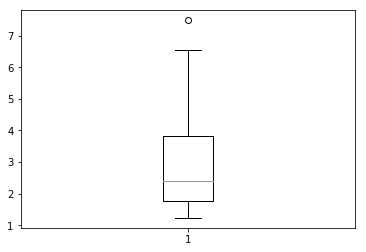

In [16]:
# outlier treatment for total_fer
plt.boxplot(dataset.total_fer)
Q1 = dataset.total_fer.quantile(0.25)
Q3 = dataset.total_fer.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset.total_fer >= Q1 - 1.5*IQR) & (dataset.total_fer <= Q3 + 1.5*IQR)]

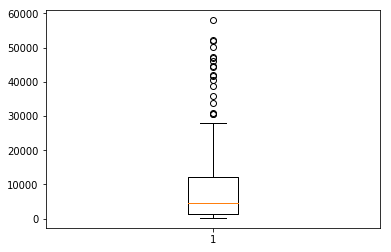

In [17]:
# outlier treatment for gdpp
plt.boxplot(dataset.gdpp)
Q1 = dataset.gdpp.quantile(0.25)
Q3 = dataset.gdpp.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset.gdpp >= Q1 - 1.5*IQR) & (dataset.gdpp <= Q3 + 1.5*IQR)]

In [18]:
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300


## Scaling the data 

In [19]:
# standardise all parameters
dataset_norm1 = dataset.drop("country", axis=1)


from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dataset_norm1 = standard_scaler.fit_transform(dataset_norm1)

In [20]:
dataset_norm1 = pd.DataFrame(dataset_norm1)
dataset_norm1.columns = ['child_mort','exports','health','imports','Income','Inflation','life_expec','total_fer','gdpp']
dataset_norm1.head()


,child_mort,exports,health,imports,Income,Inflation,life_expec,total_fer,gdpp
0,1.534697,-1.452363,0.549297,-0.035379,-0.975565,0.410557,-1.824656,1.942684,-0.871741
1,-0.674897,-0.499766,0.078813,0.171578,-0.088113,-0.459590,0.938527,-0.945201,-0.297733
2,-0.353665,0.050623,-1.008324,-0.790492,0.228682,1.581298,0.966021,-0.086454,-0.237686
3,-0.864033,0.426370,-0.158713,0.747701,0.890004,-0.995740,1.007263,-0.612783,1.018414
4,-0.737942,-0.981357,0.786823,-1.651880,0.847338,2.425077,0.869791,-0.446574,0.710069


In [21]:
len(dataset)/len(new_dataset)*100

73.05389221556887

## Hopkins Statistics

In [22]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [23]:
dataset_new=pd.read_csv('Country-data.csv')
dataset_new.drop(['country'], inplace= True,axis=1)

In [24]:
hopkins(dataset_new)

0.8560159107521846

In [25]:
hopkins(dataset_norm1)

0.7442058298315138

## Silhouette Analysis

In [26]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(dataset_norm1)
    sse_.append([k, silhouette_score(dataset_norm1, kmeans.labels_)])

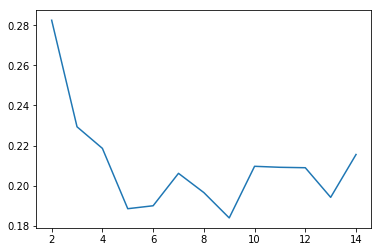

In [27]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

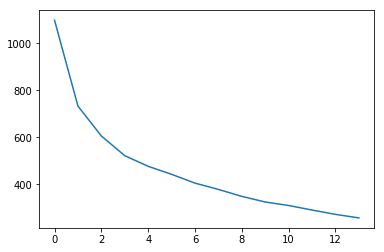

In [218]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,15)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dataset_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [29]:
# Kmeans with K=2 , as from the elbow graph we can analyse the value of k=2
model_clus2 = KMeans(n_clusters = 2, max_iter=50)
model_clus2.fit(dataset_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
# analysis of clusters formed
dataset.index = pd.RangeIndex(len(dataset.index))
RFM_km = pd.concat([dataset, pd.Series(model_clus2.labels_)], axis=1)
RFM_km.columns = ['country','child_mort','exports','health','imports','Income','Inflation','life_expec','total_fer','gdpp', 'ClusterID']


km_clusters_child_mort = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).imports.mean())
km_clusters_Income = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Income.mean())
km_clusters_Inflation = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).gdpp.mean())

In [61]:
df = pd.concat([pd.Series([0,1]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports,km_clusters_Income,km_clusters_Inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","Income_mean","Inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,Income_mean,Inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,70.672549,27.978412,5.930980,40.605214,3777.078431,8.878529,62.517647,4.350784,1678.666667
1,1,16.387324,44.242254,6.698169,49.071831,15769.154930,5.830141,74.469014,2.055211,8974.507042


In [211]:
# getting countries corresponding to cluster id
country_cluster_df=RFM_km[['country','ClusterID']]
country_cluster_df.head()

,country,ClusterID
0,Afghanistan,0
1,Albania,1
2,Algeria,1
3,Antigua and Barbuda,1
4,Argentina,1


In [214]:
# getting countries with cluster id =0
country_cluster_df[country_cluster_df['ClusterID'] == 0

,country,ClusterID
0,Afghanistan,0
9,Bangladesh,0
13,Benin,0
15,Bolivia,0
17,Botswana,0
20,Burkina Faso,0
21,Burundi,0
22,Cambodia,0
23,Cameroon,0
28,Comoros,0


In [215]:
# getting countries with cluster id =1
country_cluster_df[country_cluster_df['ClusterID'] == 1]

,country,ClusterID
1,Albania,1
2,Algeria,1
3,Antigua and Barbuda,1
4,Argentina,1
5,Armenia,1
6,Azerbaijan,1
7,Bahamas,1
8,Bahrain,1
10,Barbados,1
11,Belarus,1


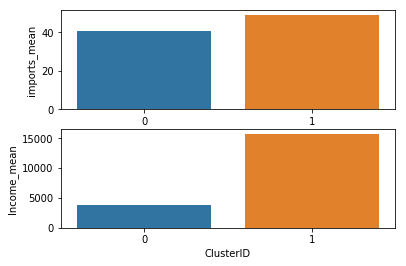

In [125]:
plt.subplot(2, 1, 1)
sns.barplot(x=df.ClusterID, y=df.imports_mean)

plt.subplot(2, 1, 2)
sns.barplot(x=df.ClusterID, y=df.Income_mean)

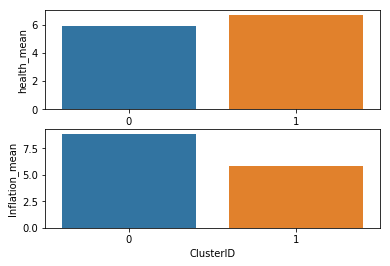

In [126]:
plt.subplot(2, 1, 1)
sns.barplot(x=df.ClusterID, y=df.health_mean)
plt.subplot(2, 1, 2)
sns.barplot(x=df.ClusterID, y=df.Inflation_mean)

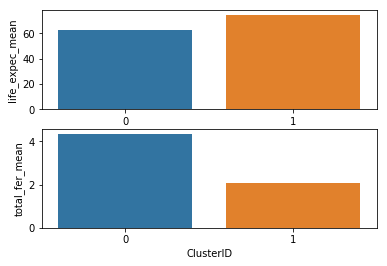

In [127]:
plt.subplot(2,1,1)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)
plt.subplot(2,1,2)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)

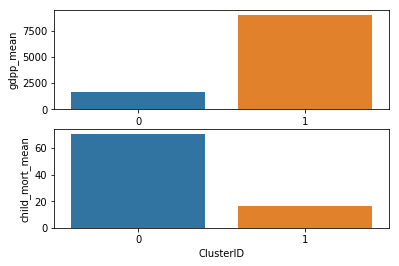

In [216]:
plt.subplot(2,1,1)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
plt.subplot(2,1,2)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)



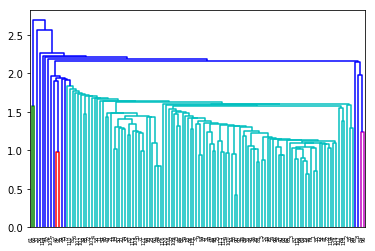

In [129]:
# heirarchical clustering
mergings = linkage(dataset_norm1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

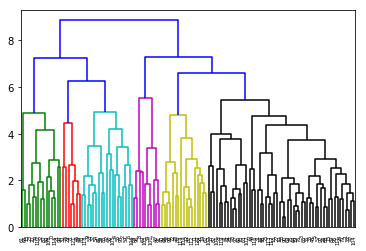

In [42]:
mergings = linkage(dataset_norm1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

## Now taking new_dataset for performing PCA

In [43]:
new_dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [44]:
new_dataset.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [45]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


## Feature Standardisation

In [46]:
# Normalising continuous features
df = new_dataset[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']] 

In [47]:
normalized_df=(df-df.mean())/df.std()
new_dataset = new_dataset.drop(['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'],1)
new_dataset = pd.concat([new_dataset,normalized_df],axis=1)
new_dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,Albania,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,Algeria,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,Angola,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,Antigua and Barbuda,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [48]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [49]:
#Doing the PCA on the new_dataset data
new_dataset.drop(['country'],inplace=True,axis=1)
pca.fit(new_dataset)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [50]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [51]:
colnames = list(new_dataset.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income


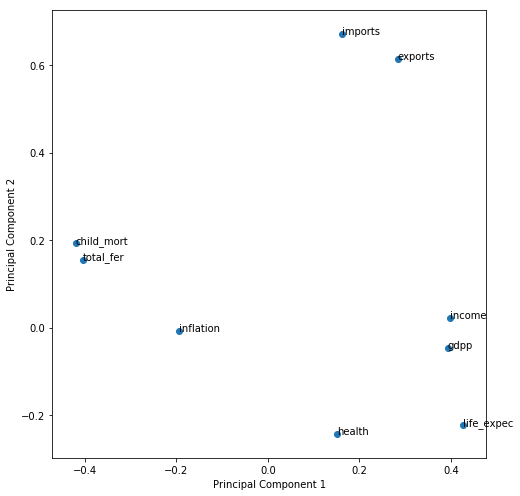

In [316]:
%matplotlib inline
fig = plt.figure(figsize = (7,7))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

We see that the fist component is in the direction where the 'life_expec' variables are heavy
 - These 3 components also have the highest of the loadings

#### Looking at the screeplot to assess the number of needed principal components

In [53]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

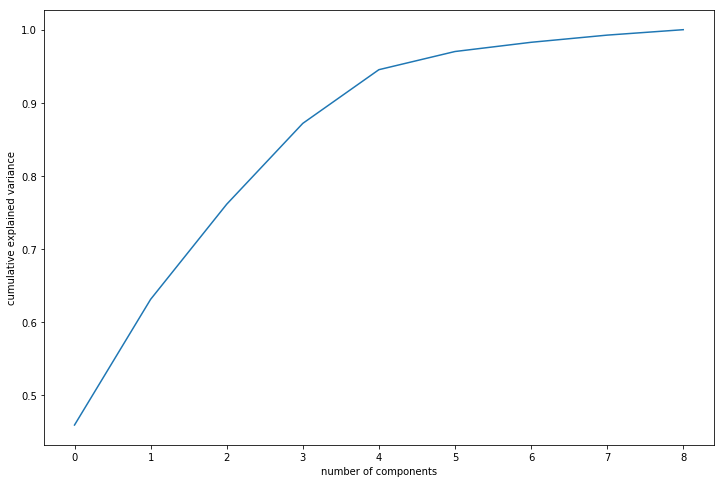

In [54]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 4 components are enough to describe 95% of the variance in the dataset
- We'll choose 4 components for our modeling

In [55]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

#### Basis transformation - getting the data onto our PCs

In [56]:
df_train_pca = pca_final.fit_transform(new_dataset)
df_train_pca.shape

(167, 4)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [57]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

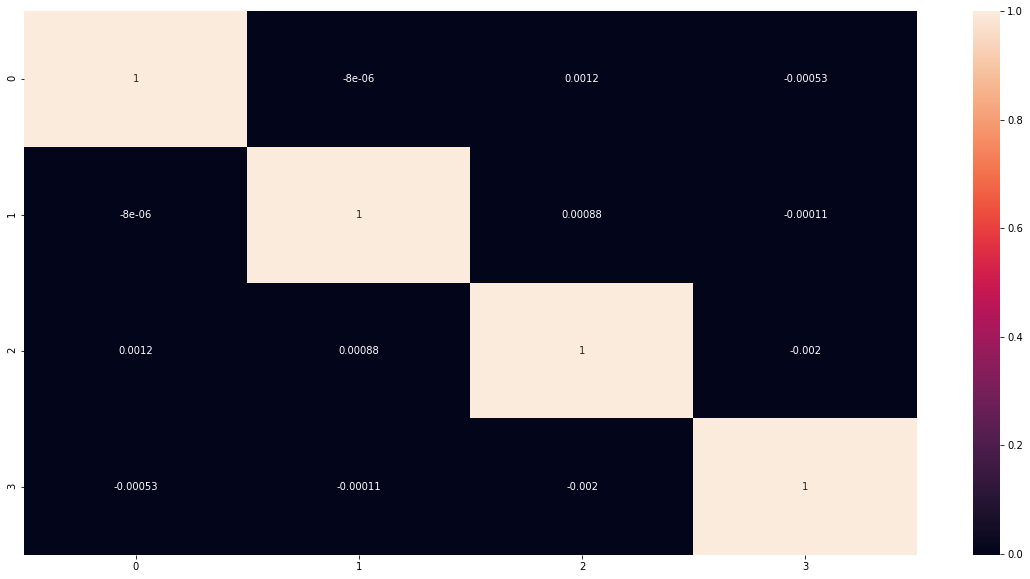

In [58]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [59]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0011961925092542815 , min corr:  -0.0020378295355501647


#### Indeed - there is no correlation between any two components! Good job, PCA!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [246]:
# importing data set
final_new_dataset=pd.read_csv("Country-data.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

In [249]:
final_pca_data=pd.concat([pd.DataFrame(df_train_pca),pd.DataFrame(final_new_dataset.country)],axis=1)
final_pca_data.head()

,0,1,2,3,country
0,-2.905050,0.088089,0.718841,0.993710,Afghanistan
1,0.428070,-0.586096,0.320090,-1.167681,Albania
2,-0.282140,-0.445318,-1.221462,-0.847578,Algeria
3,-2.922180,1.694341,-1.517172,0.873340,Angola
4,1.028893,0.130097,0.192344,-0.842275,Antigua and Barbuda


In [261]:
dataset_norm3 = final_pca_data.drop("country", axis=1)

In [262]:
# Kmeans with K=2 , as from the elbow graph we can analyse the value of k=2
model_clus3 = KMeans(n_clusters = 2, max_iter=50)
model_clus3.fit(dataset_norm3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [291]:
# analysis of clusters formed
dataset_norm3.index = pd.RangeIndex(len(final_pca_data.index))
RFM_pca = pd.concat([final_pca_data, pd.Series(model_clus3.labels_)], axis=1)
# RFM_pca.head()
RFM_pca.columns = ['PC1','PC2','PC3','PC4','country','ClusterID']

# RFM_pca.head()

km_clusters_pc1 = 	pd.DataFrame(RFM_pca.groupby(["ClusterID"]).PC1.mean())
km_clusters_pc2 = 	pd.DataFrame(RFM_pca.groupby(["ClusterID"]).PC2.mean())
km_clusters_pc3 = 	pd.DataFrame(RFM_pca.groupby(["ClusterID"]).PC3.mean())
km_clusters_pc4 = 	pd.DataFrame(RFM_pca.groupby(["ClusterID"]).PC4.mean())


In [297]:
df1= pd.concat([pd.Series([0,1]), km_clusters_pc1, km_clusters_pc2, km_clusters_pc3,km_clusters_pc4], axis=1)
df1.columns = ["ClusterID","PC1","PC2","PC3","PC4"]
df1

,ClusterID,PC1,PC2,PC3,PC4
0,0,1.350215,-0.186942,-0.005452,-0.184769
1,1,-1.917697,0.265512,0.007744,0.262425


In [299]:
RFM_pca.head()

,PC1,PC2,PC3,PC4,country,ClusterID
0,-2.905050,0.088089,0.718841,0.993710,Afghanistan,1
1,0.428070,-0.586096,0.320090,-1.167681,Albania,0
2,-0.282140,-0.445318,-1.221462,-0.847578,Algeria,0
3,-2.922180,1.694341,-1.517172,0.873340,Angola,1
4,1.028893,0.130097,0.192344,-0.842275,Antigua and Barbuda,0


In [300]:
# getting countries corresponding to cluster id
country_cluster_final=RFM_pca[['country','ClusterID']]
country_cluster_final.head()

,country,ClusterID
0,Afghanistan,1
1,Albania,0
2,Algeria,0
3,Angola,1
4,Antigua and Barbuda,0


In [304]:
# getting countries with cluster id =0
country_cluster_final[country_cluster_final['ClusterID'] == 0]

,country,ClusterID
1,Albania,0
2,Algeria,0
4,Antigua and Barbuda,0
5,Argentina,0
6,Armenia,0
7,Australia,0
8,Austria,0
9,Azerbaijan,0
10,Bahamas,0
11,Bahrain,0


In [305]:
# getting countries with cluster id =0
country_cluster_final[country_cluster_final['ClusterID'] == 1]

,country,ClusterID
0,Afghanistan,1
3,Angola,1
12,Bangladesh,1
17,Benin,1
19,Bolivia,1
21,Botswana,1
25,Burkina Faso,1
26,Burundi,1
27,Cambodia,1
28,Cameroon,1


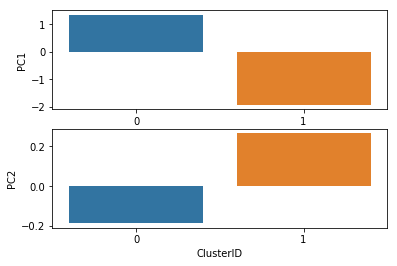

In [312]:
plt.subplot(2, 1, 1)
sns.barplot(x=df1.ClusterID, y=df1.PC1)

plt.subplot(2, 1, 2)
sns.barplot(x=df1.ClusterID, y=df1.PC2)

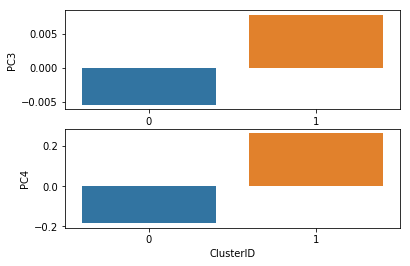

In [313]:
plt.subplot(2, 1, 1)
sns.barplot(x=df1.ClusterID, y=df1.PC3)
plt.subplot(2, 1, 2)
sns.barplot(x=df1.ClusterID, y=df1.PC4)